# Importar librerías y datos

In [21]:
import numpy as np
import pandas as pd

In [ ]:
jugadores = pd.read_csv("players_22.csv")

In [23]:
jugadores

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


## Extracción de columnas (*features*) de interes

In [24]:
columnas_de_interes = ["overall", "potential", "value_eur", "wage_eur", "age"]
jugadores = jugadores.dropna(subset=columnas_de_interes)
datos = jugadores[columnas_de_interes].copy()
datos

,overall,potential,value_eur,wage_eur,age
0,93,93,78000000.0,320000.0,34
1,92,92,119500000.0,270000.0,32
2,91,91,45000000.0,270000.0,36
3,91,91,129000000.0,270000.0,29
4,91,91,125500000.0,350000.0,30
...,...,...,...,...,...
19234,47,52,70000.0,1000.0,22
19235,47,59,110000.0,500.0,19
19236,47,55,100000.0,500.0,21
19237,47,60,110000.0,500.0,19


# Normalización de Datos

## Uso de Normalización Min - Max

${\displaystyle X'={\frac {X-X_{min}}{X_{max}-X_{min}}}}$

- x.min(): Entrega Serie con minimo por COLUMNA
- x.max(): Entrega Serie con máximo por COLUMNA
- df - x: El restar a df una serie significa restar a cada FILA de df el vector x (len(serie) == n_columnas en df)

> Se normaliza con valores entre 1 y 10 para KMeans

In [25]:
datos = ((datos - datos.min())/(datos.max() - datos.min())) *9 + 1
datos

,overall,potential,value_eur,wage_eur,age
0,10.000000,9.608696,4.618307,9.227468,7.000000
1,9.804348,9.413043,6.543654,7.939914,6.333333
2,9.608696,9.217391,3.087308,7.939914,7.666667
3,9.608696,9.217391,6.984396,7.939914,5.333333
4,9.608696,9.217391,6.822018,10.000000,5.666667
...,...,...,...,...,...
19234,1.000000,1.586957,1.002830,1.012876,3.000000
19235,1.000000,2.956522,1.004686,1.000000,2.000000
19236,1.000000,2.173913,1.004222,1.000000,2.666667
19237,1.000000,3.152174,1.004686,1.000000,2.000000


# Inicializar Centroides

- $x.sample(n)$: Toma n valores al azar del array x
- $df.apply(lambda \, x : f(x))$: Aplica $f(x)$ corriendo sobre las filas ie columna a columna

In [26]:
def inicializar_centroides(datos, k):
    # Importante el ignore_index si no al "unir" columnas index no calzan y se rellena con NaN
    centroides = datos.apply(lambda x: x.sample(n=k, ignore_index=True))
    return centroides.T


# Asociar a Centroides

Obtener centroide asociado a cada data point

- $df -x$ : Resta vector x sobre df fila a fila ($len(x) = n\_col \, df$)
- $sum(axis=1)$ : Suma corriendo en columnas ie. condensa cada fila en la suma
- $idxmin(axis=1)$ : Retorna el menor indice corriendo en columnas ie condensa cada fila a idx de valor menor

In [27]:
def asociar_centroides(datos, centroides):
    distancias = centroides.apply(lambda x: np.sqrt(((datos-x)**2).sum(axis=1)))
    return distancias.idxmin(axis=1)

# Cálculo de nuevos centroides

Se calcula el nuevo centroide como la media geométrica de todos los datapoint asociados a centroide

- $df.groupby(x)$: Se generan "grupos" apilando filas de df donde $x[i]$ es igual (ojo que no entrega un df porque "grupos" tienen distintas dim)

- Uso de $log$ y $exp$ (para mayor eficiencia computacional)   
- Media geométrica corresponde a pitatoria de los n elemento a la $n-ésima$ raiz   
- $np.log(x)$ convierte cada elemento a su log   
- $mean()$ suma los $n$ $log$ y los divide por $n := \frac{\sum log(elemento))}{n}$ = $log(\prod elemento ^{\frac{1}{n}})$  
> Importante notar que $mean(axis=0)$ default, x es una matriz con los elementos correspondientes a cada group ie centroides
> Por lo que resultado es el mean en rows ie por jugador calculado en cada col ie *features*
- $np.exp$ simplemente saca el $log$, shape de resultado igual a numero de *features*

In [28]:
def nuevos_centroides(datos, asociaciones):
    centroides = datos.groupby(asociaciones).apply(lambda x : np.exp(np.log(x).mean())).T
    return centroides

# Graficar clusters

- Extraer dos componentes principales con PCA
- Transformar datapoints y centroides según algoritmo PCA
- Gráficar cada datapoint transformado, con color asociado a label ie. centroide asociado
- Gráficar cada centroide transformado con color rojo

In [29]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [30]:
def graficar_clusters(datos, asociaciones, centroides, iteracion, k):
    pca = PCA(n_components=2)
    datos_2d = pca.fit_transform(datos)
    centroides_2d = pca.transform(centroides.T)
    

    clear_output(wait=True)
    plt.title(f'K-Means Clusters (k={k})  |  Iteración {iteracion}')
    plt.xlabel('Primer componente (PCA)')
    plt.ylabel('Segundo componente (PCA)')
    plt.scatter(datos_2d[:, 0], datos_2d[:, 1], c = asociaciones)
    plt.scatter(centroides_2d[:, 0], centroides_2d[:, 1], c ="red")

    plt.savefig(f"kmeans-{k}.png")
    plt.show()

# Loop entrenamiento

- Inicializar k centroides al azar.
- Asociar cada datapoint (jugadores) al centroide mas cercano.
- Por cada centroide, calcular nuevo centroide como la media geométrica de los datapoint asociados.
- Graficar clusters (datos por cluster y centroide del cluster).
- Repetir hasta que los centroides no cambian o se cumple el máximo de iteraciones.

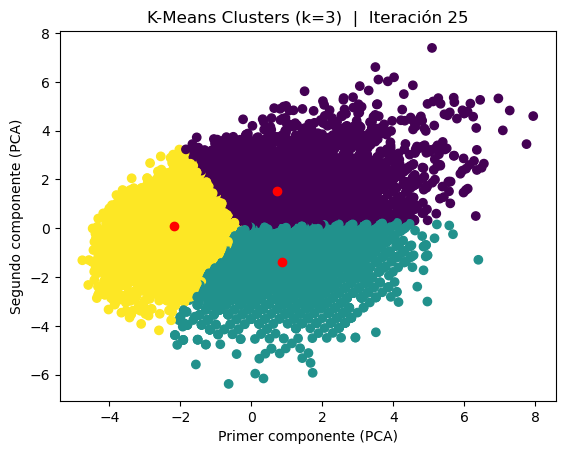

In [31]:
max_iteraciones = 100
k = 3

centroides = inicializar_centroides(datos, k)
centroides_previos = pd.DataFrame()

iteracion = 0
while iteracion < max_iteraciones and not centroides.equals(centroides_previos):
    centroides_previos = centroides
    asociaciones = asociar_centroides(datos, centroides)
    centroides = nuevos_centroides(datos, asociaciones)
    graficar_clusters(datos, asociaciones, centroides, iteracion, k)
    iteracion += 1
    
    


In [32]:
centroides

,0,1,2
overall,5.807503,4.781960,3.205672
potential,6.497870,4.506813,4.930905
value_eur,1.285685,1.044909,1.026655
wage_eur,1.420500,1.118498,1.028564
age,3.598215,5.467648,2.514741


## Función auxiliar para hacer tablas

In [56]:
def show_table(df, title):
    fig = plt.figure(figsize = (8, .2))
    ax = fig.add_subplot(111)

    #create table
    ax.table(cellText = df.values, rowLabels = df.index, 
             colLabels = df.columns, cellLoc='center')

    #add title to table
    ax.set_title(title)

    #turn axes off
    ax.axis('off')
    
    plt.savefig(f"{title}.png", bbox_inches='tight')
    
    plt.show()
    

# Analizar resultados

- Mostrar 5 jugadores de cada cluster
- Extraer nombre de jugador usando df jugadores y usando la columna "short_name"
- Se extraen las filas donde $asociaciones = i$ por cada cluster

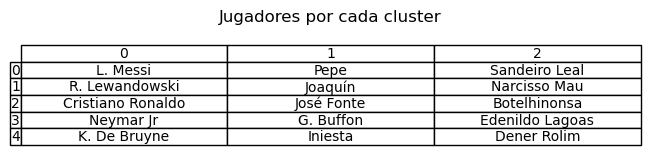

In [57]:
table = []

for i in range(k):
    table.append(jugadores[asociaciones==i]["short_name"][:5])

table = pd.DataFrame(np.array(table)).T
show_table(table, "Jugadores por cada cluster")

## Crear tabla comparativa por *features*

Se reemplaza valor de *feature* de cada centroide por su posición relativa comparando el mismo *feature* con los otros centroides.
- Uso doble de $df.argsort()$: Para obtener posición relativa como un *int*, con 0 para el valor menor
- Uso de $df.replace(map)$ para aplicar mapeo sobre $df$, reemplazando 0 por BAJO, etc.

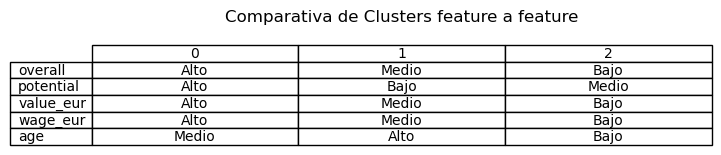

In [58]:
mapa = {}
if k == 3:
    mapa ={0: "Bajo", 1: "Medio", 2: "Alto"}
elif k == 4:
    mapa ={0: "Bajo", 1: "Medio Bajo", 2: "Medio Alto", 3: "Alto"}

if len(mapa)> 0:
    centroides_rel = centroides.apply(lambda x: x.argsort().argsort(), axis=1)
    centroides_rel_labeled = centroides_rel.replace(mapa)  
    #create table
    show_table(centroides_rel_labeled, "Comparativa de Clusters feature a feature")
    

> ### Explicación de uso doble de  *argsort()*
> - $argsort(argsort(x))$ entrega posicion relativa de valores en row.  
> - Ej $x$ = [2 0 1 5 4 1 9]   
> - $argsort(x)$ = [1 2 5 0 4 3 6]  
> - $argsort(argsort(x))$ = [3 0 1 5 4 2 6]  
> - Funciona tambien para $x$ compuesto de no enteros.  

# Comparar con KMeans de Scikit Learn

- Uso de $fit()$ para entrenar modelo de Scikit-Learn
- $kmeans.cluster\_centers\_$: Centroides según KMeans de Scikit Learn

In [36]:
from sklearn.cluster import KMeans

kmeans = KMeans(k)
kmeans.fit(datos)

sk_centroides = pd.DataFrame(kmeans.cluster_centers_, columns=columnas_de_interes).T

display(centroides)
display(sk_centroides)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,0,1,2
overall,5.807503,4.781960,3.205672
potential,6.497870,4.506813,4.930905
value_eur,1.285685,1.044909,1.026655
wage_eur,1.420500,1.118498,1.028564
age,3.598215,5.467648,2.514741


,0,1,2
overall,4.800692,6.216357,3.584448
potential,4.506192,6.615802,5.201302
value_eur,1.040086,1.409792,1.035318
wage_eur,1.112896,1.650206,1.039333
age,5.602391,4.126399,2.703535


## Graficar clusters

- Se grafican clusters de manera similar a los clusters encontrados a mano
- Uso de PCA para poder graficar en dos dimensiones
- $kmeans.labels\_$: Asociaciones de cluster de cada datapoint según KMeans de Scikit Learn

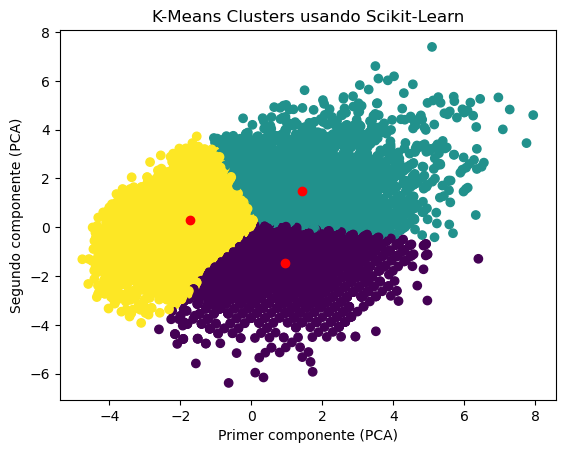

In [37]:
pca = PCA(2)
datos_2d = pca.fit_transform(datos)
centroides_2d = pca.transform(centroides.T)
centroides_sk_2d = pca.transform(sk_centroides.T)
plt.title('K-Means Clusters usando Scikit-Learn')
plt.xlabel('Primer componente (PCA)')
plt.ylabel('Segundo componente (PCA)')
plt.scatter(datos_2d[:, 0], datos_2d[:, 1], c=kmeans.labels_)
plt.scatter(centroides_sk_2d[:, 0], centroides_sk_2d[:, 1], c="red")
plt.savefig(f"kmeans-{k}_scikit")

## Comparación de centroides

- Se grafican los centroides calculados manualmente con círculos y los centroides encontrados KMeans de Scikit Learn con triángulos.
- Uso de PCA nuevamente para poder graficar en dos dimensiones.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


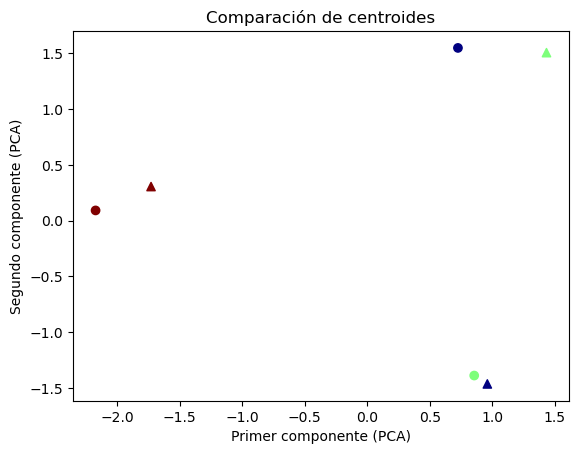

In [38]:
pca = PCA(2)
d1 = pca.fit_transform(datos)
c1 = pca.transform(centroides.T)
c2 = pca.transform(kmeans.cluster_centers_)

plt.title("Comparación de centroides")
plt.xlabel('Primer componente (PCA)')
plt.ylabel('Segundo componente (PCA)')
plt.scatter(c1[: ,0], c1[:, 1], c = range(k), marker = "o", cmap=plt.get_cmap("jet"))
plt.scatter(c2[: ,0], c2[:, 1], c = range(k), marker = "^", cmap=plt.get_cmap("jet"))
plt.savefig("comparacion_centroides.png")
plt.show()

